In [1]:
##IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
## DOWNLOADING DATASET AND IMPORTING INTO DATA FRAME 
import opendatasets as od
dataset_url = 'https://www.kaggle.com/kianwee/agricultural-raw-material-prices-19902020'

In [3]:
od.download(dataset_url)

Skipping, found downloaded files in "./agricultural-raw-material-prices-19902020" (use force=True to force download)


In [4]:
import os

In [5]:
os.listdir('./agricultural-raw-material-prices-19902020')

['agricultural_raw_material.csv']

In [6]:
df=pd.read_csv('./agricultural-raw-material-prices-19902020/agricultural_raw_material.csv')

In [7]:
df.shape

(361, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [9]:
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [10]:
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,...,500.37,-0.22%,1.66,7.79%,NaN,NaN,NaN,NaN,875.00,0.00%
357,Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,...,499.64,-0.15%,1.68,1.20%,NaN,NaN,NaN,NaN,875.00,0.00%
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,...,496.28,-0.67%,1.61,-4.17%,NaN,NaN,NaN,NaN,875.00,0.00%
359,Mar-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,...,507.96,2.35%,1.50,-6.83%,NaN,NaN,NaN,NaN,875.00,0.00%


In [11]:
## handling missing,invalid and incorrect data
df=df.replace('%','',regex= True)
df=df.replace('-','',regex= True)
df=df.replace(',','',regex= True)
df=df.replace('',np.nan)
df


,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr90,482.34,NaN,236,NaN,1.83,NaN,1071.63,NaN,161.20,...,312.36,NaN,0.84,NaN,120.66,NaN,218.76,NaN,829.29,NaN
1,May90,447.26,7.27,234,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Dec19,NaN,NaN,NaN,NaN,1.67,1.21,NaN,NaN,272.80,...,500.37,0.22,1.66,7.79,NaN,NaN,NaN,NaN,875.00,0.00
357,Jan20,NaN,NaN,NaN,NaN,1.74,4.19,NaN,NaN,272.40,...,499.64,0.15,1.68,1.20,NaN,NaN,NaN,NaN,875.00,0.00
358,Feb20,NaN,NaN,NaN,NaN,1.69,2.87,NaN,NaN,270.56,...,496.28,0.67,1.61,4.17,NaN,NaN,NaN,NaN,875.00,0.00
359,Mar20,NaN,NaN,NaN,NaN,1.49,11.83,NaN,NaN,276.93,...,507.96,2.35,1.50,6.83,NaN,NaN,NaN,NaN,875.00,0.00


In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

In [14]:
lst=[ 'Coarse wool Price', 'Coarse wool price % Change',
       'Copra Price', 'Copra price % Change', 'Cotton Price',
       'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change',
       'Hard log Price', 'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change']

In [15]:
lst

['Coarse wool Price',
 'Coarse wool price % Change',
 'Copra Price',
 'Copra price % Change',
 'Cotton Price',
 'Cotton price % Change',
 'Fine wool Price',
 'Fine wool price % Change',
 'Hard log Price',
 'Hard log price % Change',
 'Hard sawnwood Price',
 'Hard sawnwood price % Change',
 'Hide Price',
 'Hide price % change',
 'Plywood Price',
 'Plywood price % Change',
 'Rubber Price',
 'Rubber price % Change',
 'Softlog Price',
 'Softlog price % Change',
 'Soft sawnwood Price',
 'Soft sawnwood price % Change',
 'Wood pulp Price',
 'Wood pulp price % Change']

In [16]:
df[lst]=df[lst].astype('float')
df

/var/folders/2z/f04fg9l13lvdkltmz_nd_9_h0000gn/T/ipykernel_3959/463015868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[lst]=df[lst].astype('float')


,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.00,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.00,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.00,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.00,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.00,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Feb17,1029.58,0.18,1146.25,6.43,1.88,3.30,1368.14,6.06,263.45,...,483.23,1.88,2.71,5.86,157.58,7.39,287.43,7.73,875.00,0.00
323,Mar17,1059.60,2.92,1016.00,11.36,1.91,1.60,1454.83,6.34,263.48,...,483.27,0.01,2.35,13.28,160.05,1.57,300.42,4.52,875.00,0.00
324,Apr17,991.12,6.46,1044.00,2.76,1.92,0.52,1404.98,3.43,270.34,...,495.87,2.61,2.21,5.96,159.84,0.13,306.60,2.06,875.00,0.00
325,May17,1019.95,2.91,1112.50,6.56,1.95,1.56,1433.47,2.03,265.28,...,486.59,1.87,2.10,4.98,159.84,0.00,306.60,0.00,875.00,0.00


In [17]:
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.00,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.00,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.00,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.00,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.00,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Feb17,1029.58,0.18,1146.25,6.43,1.88,3.30,1368.14,6.06,263.45,...,483.23,1.88,2.71,5.86,157.58,7.39,287.43,7.73,875.00,0.00
323,Mar17,1059.60,2.92,1016.00,11.36,1.91,1.60,1454.83,6.34,263.48,...,483.27,0.01,2.35,13.28,160.05,1.57,300.42,4.52,875.00,0.00
324,Apr17,991.12,6.46,1044.00,2.76,1.92,0.52,1404.98,3.43,270.34,...,495.87,2.61,2.21,5.96,159.84,0.13,306.60,2.06,875.00,0.00
325,May17,1019.95,2.91,1112.50,6.56,1.95,1.56,1433.47,2.03,265.28,...,486.59,1.87,2.10,4.98,159.84,0.00,306.60,0.00,875.00,0.00


In [18]:
##formatting the datetime column and setting it as index for the dataset
df['Month']=df['Month'].str.upper()

/var/folders/2z/f04fg9l13lvdkltmz_nd_9_h0000gn/T/ipykernel_3959/1790105258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=df['Month'].str.upper()


In [19]:
df['Month']=pd.to_datetime(df.Month,format='%b%y')

/var/folders/2z/f04fg9l13lvdkltmz_nd_9_h0000gn/T/ipykernel_3959/3693693563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=pd.to_datetime(df.Month,format='%b%y')


In [20]:
df=df.set_index('Month')

In [21]:
df

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.00,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.00,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.00,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.00,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.00,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-01,1029.58,0.18,1146.25,6.43,1.88,3.30,1368.14,6.06,263.45,1.88,...,483.23,1.88,2.71,5.86,157.58,7.39,287.43,7.73,875.00,0.00
2017-03-01,1059.60,2.92,1016.00,11.36,1.91,1.60,1454.83,6.34,263.48,0.01,...,483.27,0.01,2.35,13.28,160.05,1.57,300.42,4.52,875.00,0.00
2017-04-01,991.12,6.46,1044.00,2.76,1.92,0.52,1404.98,3.43,270.34,2.60,...,495.87,2.61,2.21,5.96,159.84,0.13,306.60,2.06,875.00,0.00


## Exploratory Analysis and Visualization

In [22]:
##Let’s begin by importingmatplotlib.pyplot and seaborn.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
#raw-materials list
rawdata=['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
corr=df[rawdata].corr()

In [24]:
corr

,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
Coarse wool Price,1.000000,0.800808,0.529220,0.894429,0.543862,0.663731,0.174090,0.394139,0.784609,-0.268047,0.204181,0.724816
Copra Price,0.800808,1.000000,0.639698,0.821941,0.522025,0.682909,0.080097,0.394724,0.759645,-0.151216,0.238552,0.717126
Cotton Price,0.529220,0.639698,1.000000,0.696877,0.475090,0.488092,0.277867,0.320203,0.743091,-0.074293,-0.111229,0.561970
Fine wool Price,0.894429,0.821941,0.696877,1.000000,0.535908,0.621634,0.224686,0.364204,0.824915,-0.297465,0.066454,0.767960
Hard log Price,0.543862,0.522025,0.475090,0.535908,1.000000,0.813274,0.097268,0.826244,0.616214,0.238008,0.182791,0.358268
Hard sawnwood Price,0.663731,0.682909,0.488092,0.621634,0.813274,1.000000,0.115024,0.789814,0.732520,0.163081,0.387273,0.586853
Hide Price,0.174090,0.080097,0.277867,0.224686,0.097268,0.115024,1.000000,-0.066666,0.017352,0.252925,-0.104656,0.220096
Plywood Price,0.394139,0.394724,0.320203,0.364204,0.826244,0.789814,-0.066666,1.000000,0.580210,0.338684,0.462562,0.329158
Rubber Price,0.784609,0.759645,0.743091,0.824915,0.616214,0.732520,0.017352,0.580210,1.000000,-0.207149,0.175388,0.670205
Softlog Price,-0.268047,-0.151216,-0.074293,-0.297465,0.238008,0.163081,0.252925,0.338684,-0.207149,1.000000,0.411879,-0.208151


<Axes: >

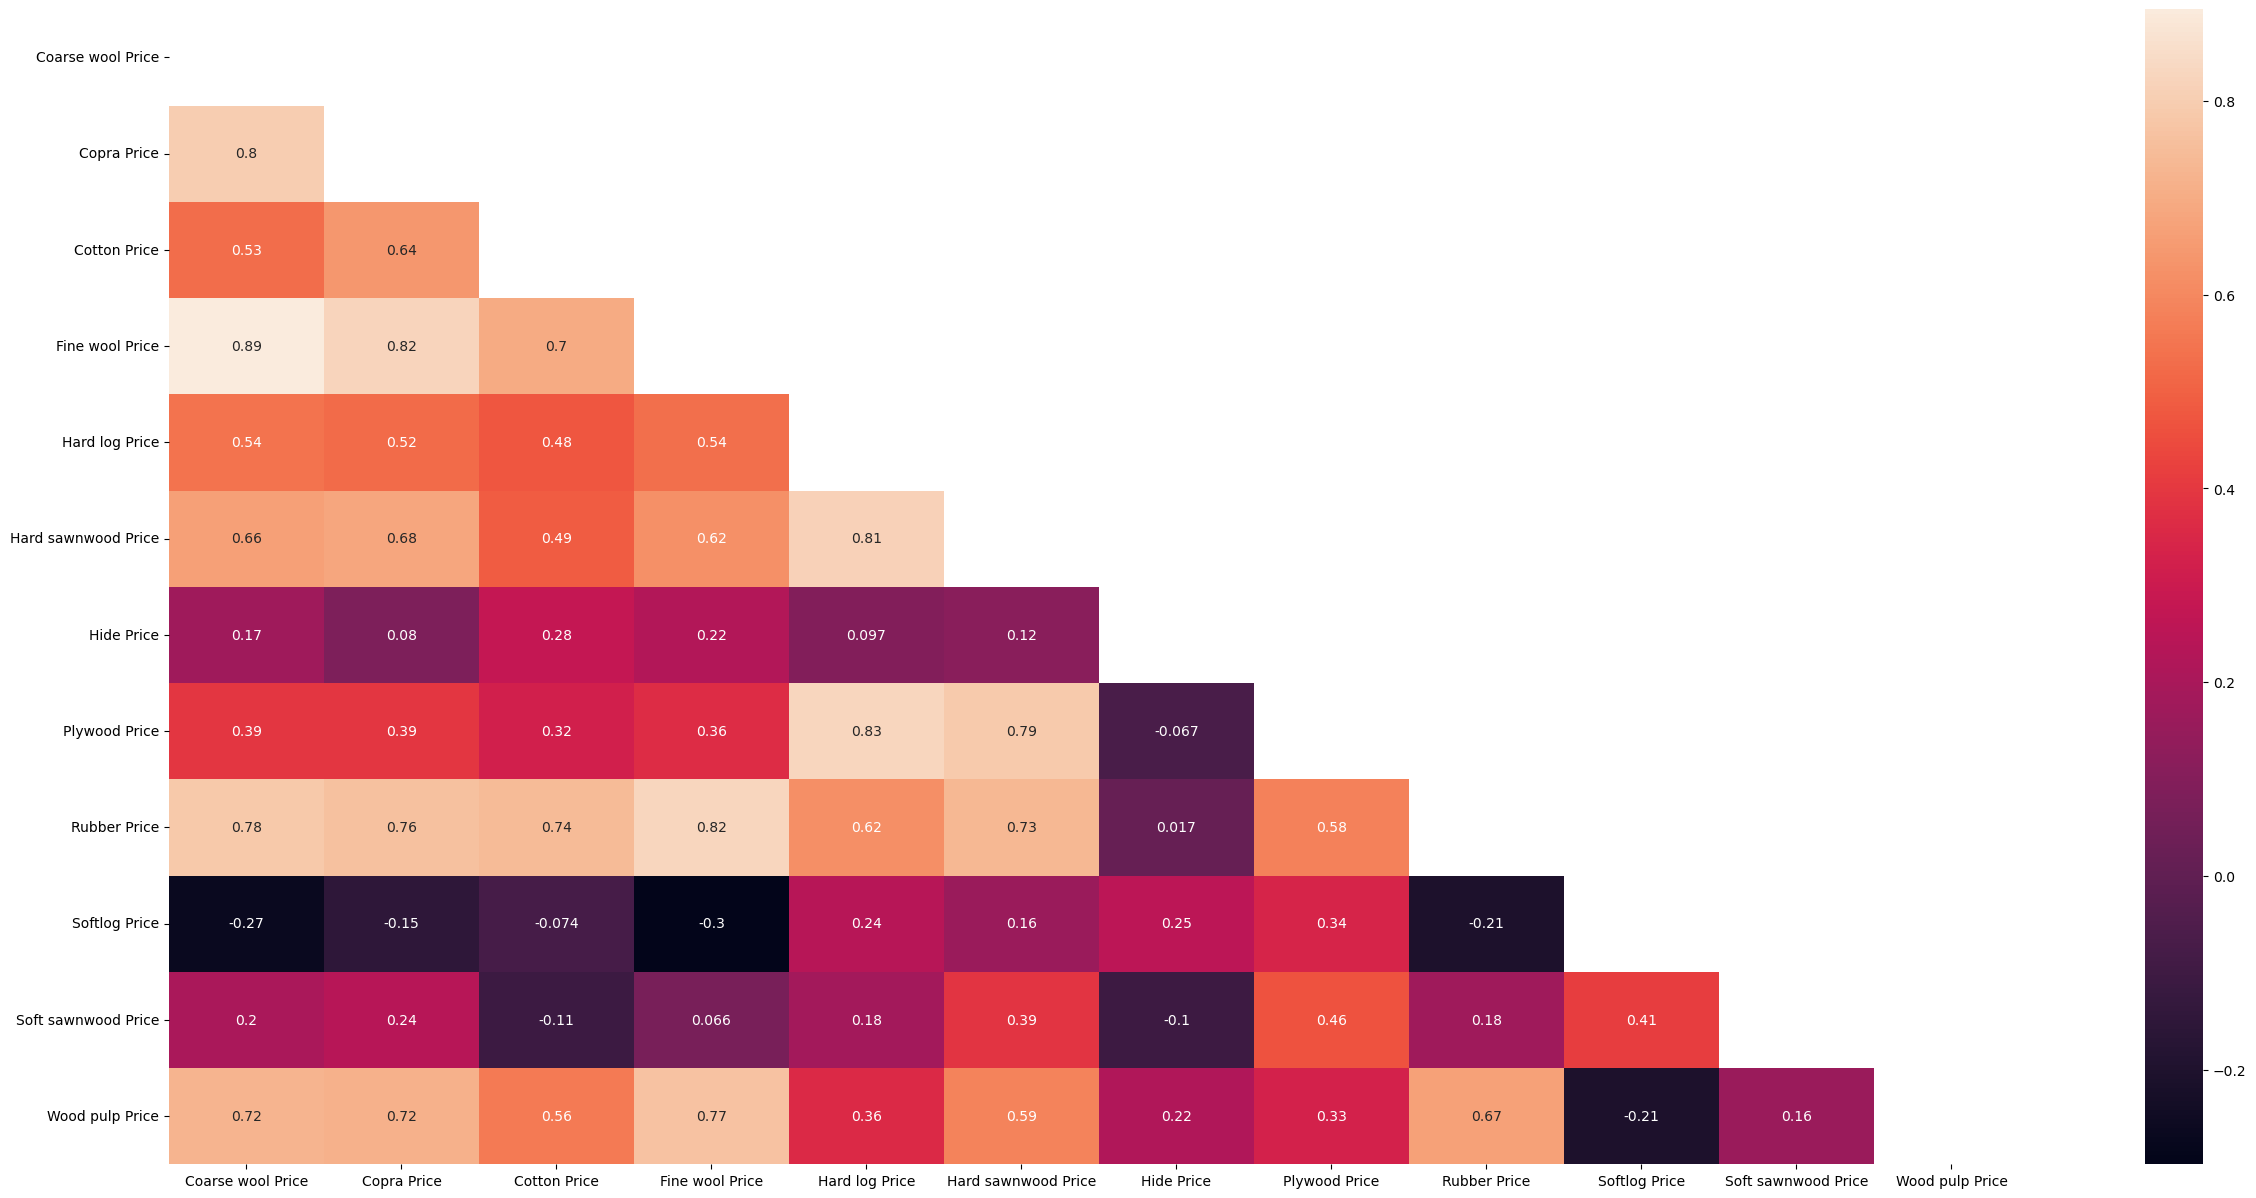

In [25]:
plt.figure(figsize=(30,15))
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,annot= True)

<Axes: >

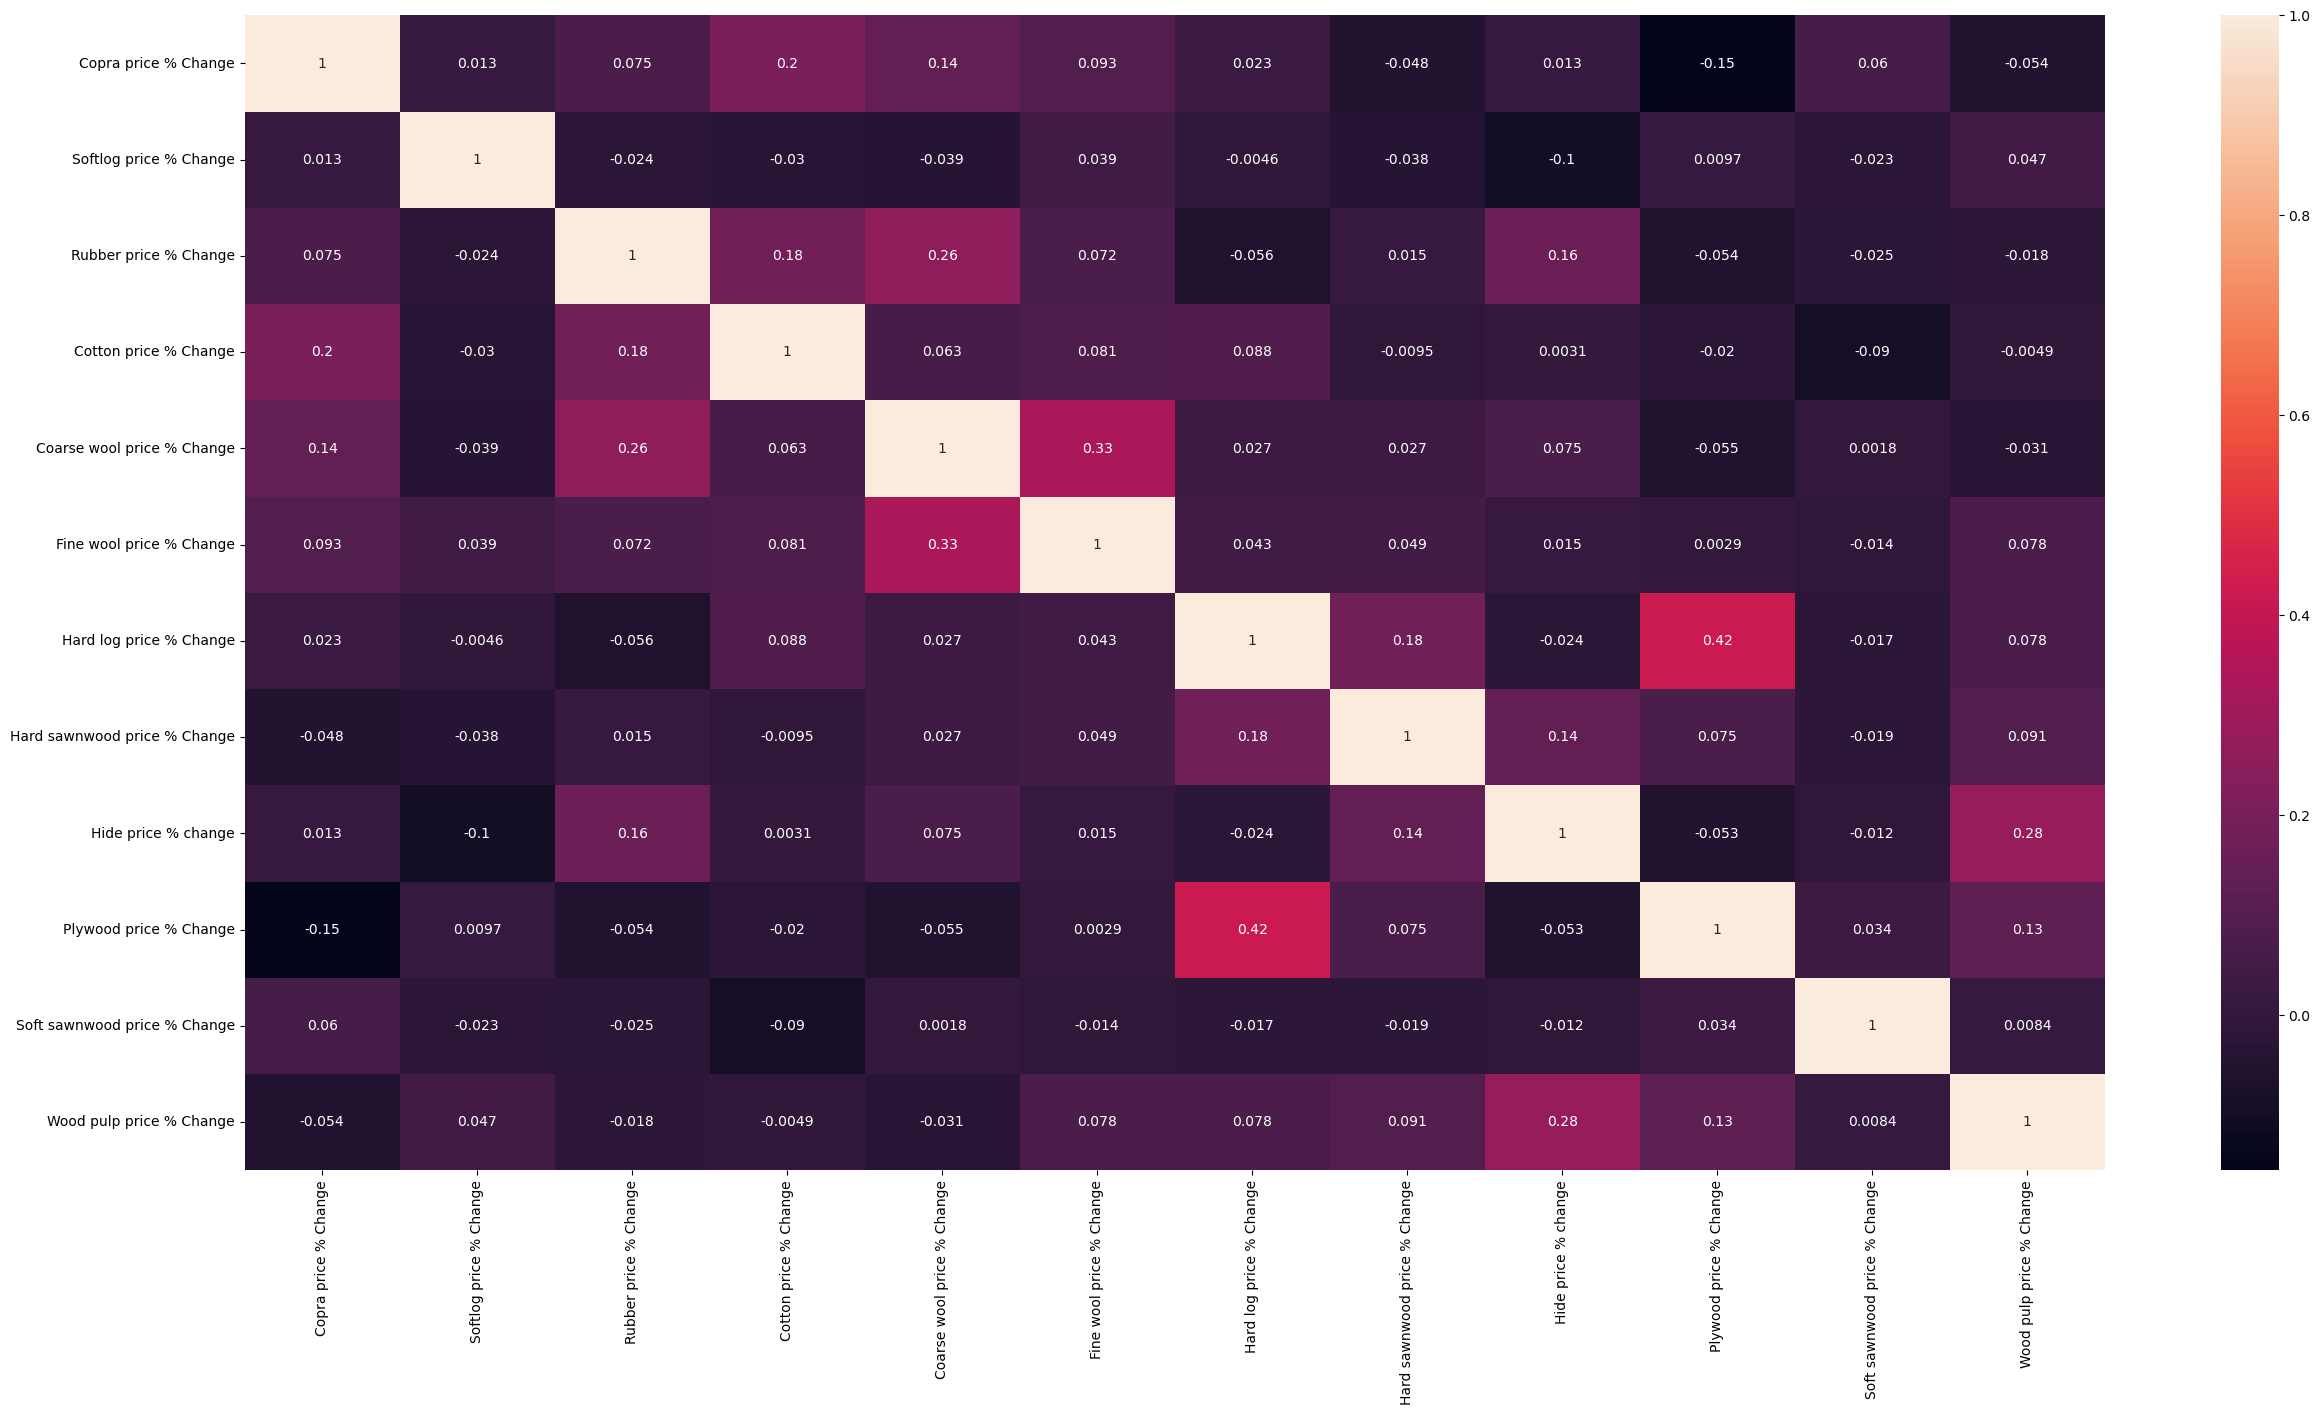

In [26]:
plt.figure(figsize=(30,15))
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
corrmat=df[changelist].corr()
sns.heatmap(corrmat,annot= True)

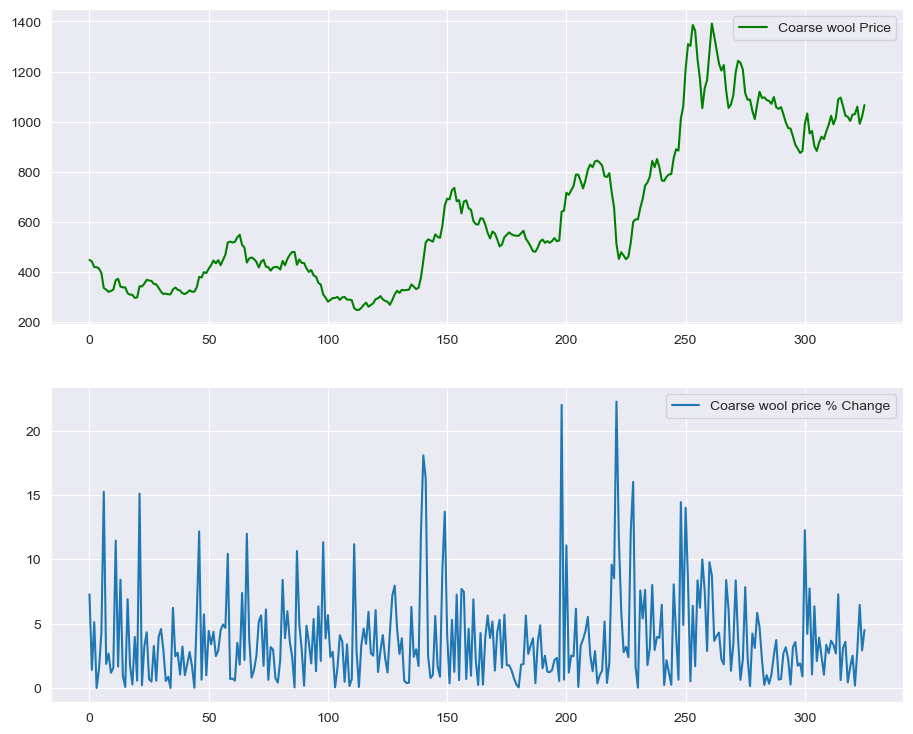

In [18]:
c=['Coarse wool Price','Coarse wool price % Change']
plt.figure(figsize=(11,9))
sns.set_style('darkgrid')
plt.subplot(211)
plt.plot(df['Coarse wool Price'],color='green')
plt.legend(['Coarse wool Price'])
plt.subplot(212)
plt.plot(df['Coarse wool price % Change'])
plt.legend(['Coarse wool price % Change'])

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

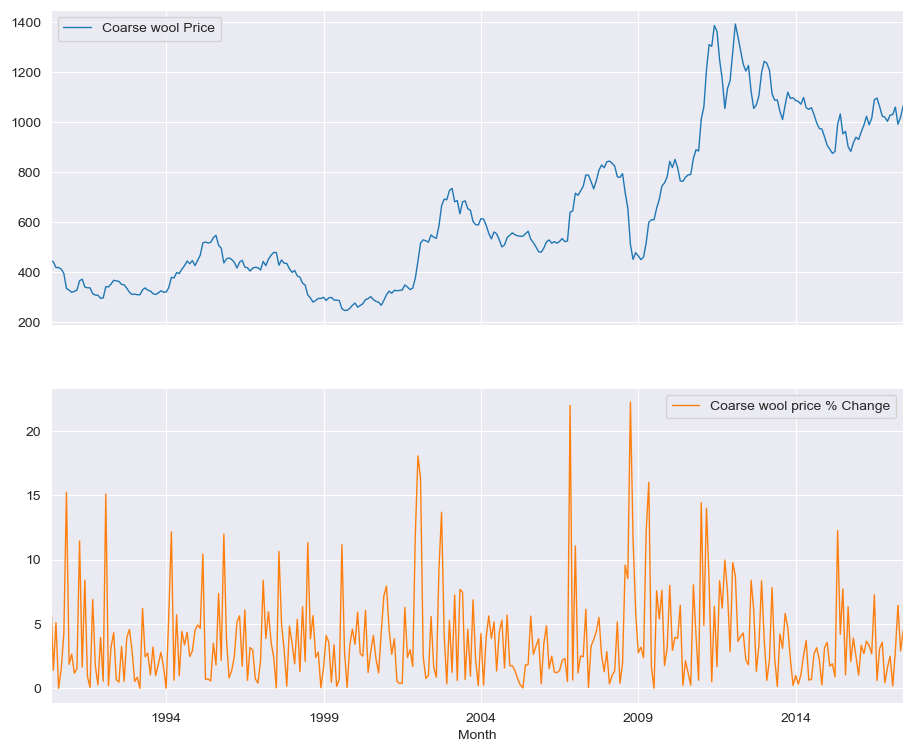

In [29]:
df[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

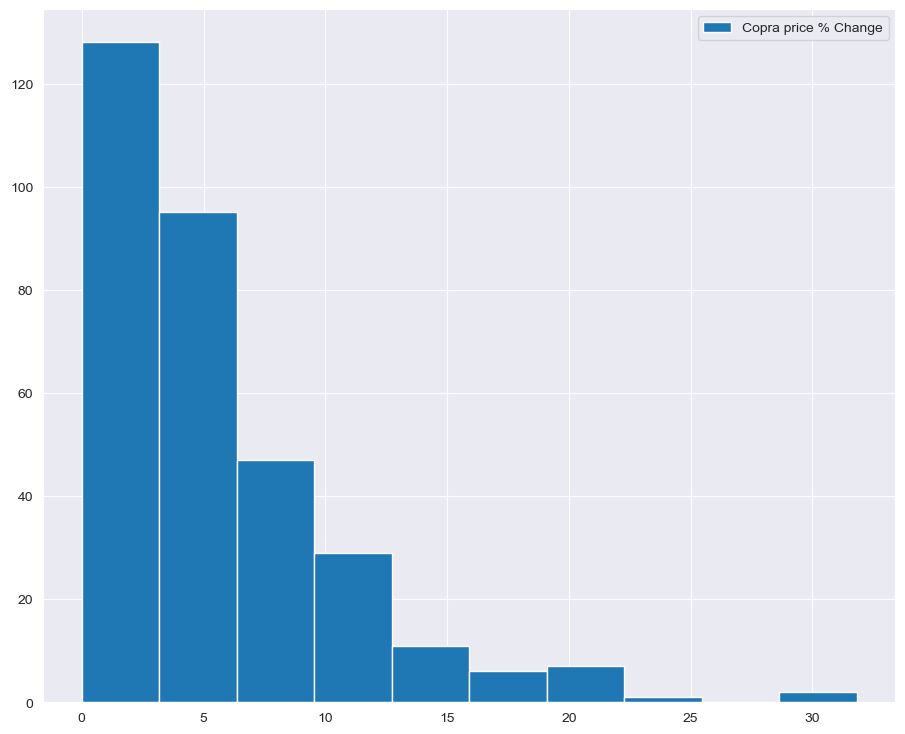

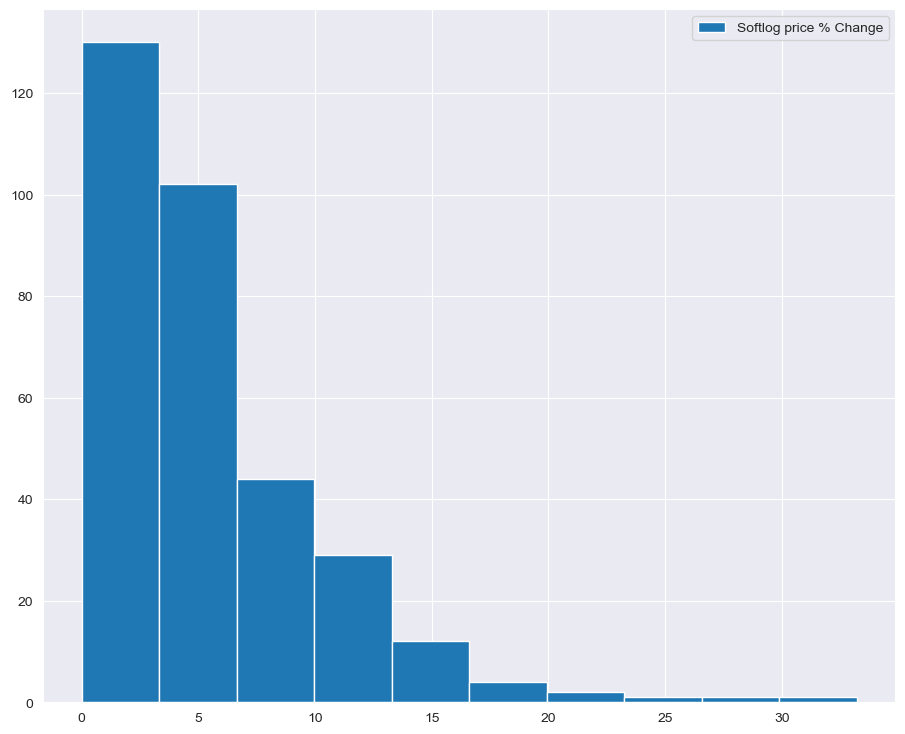

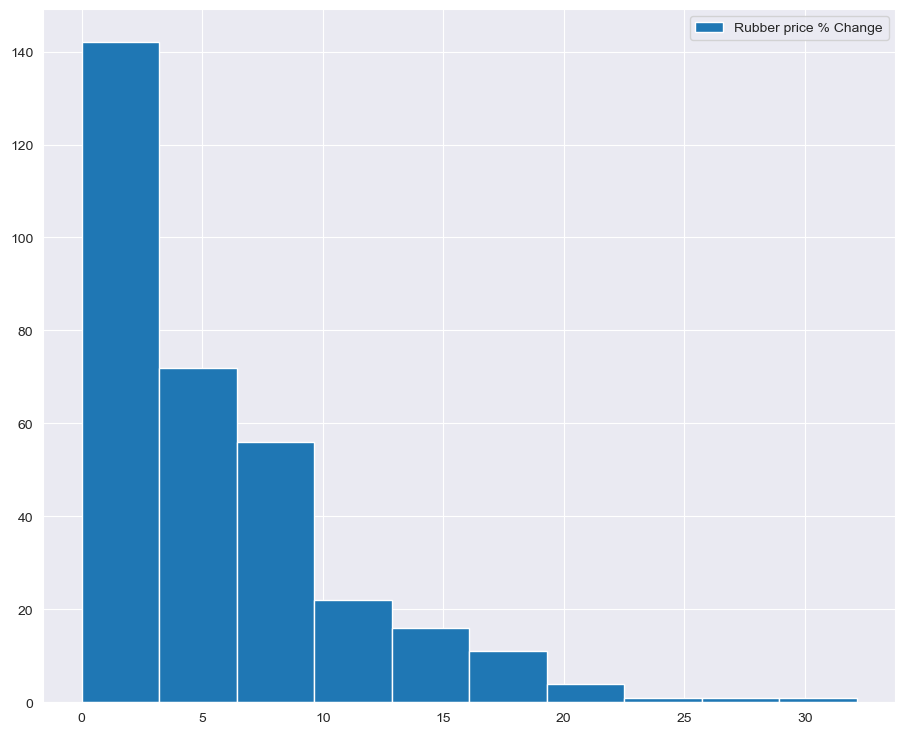

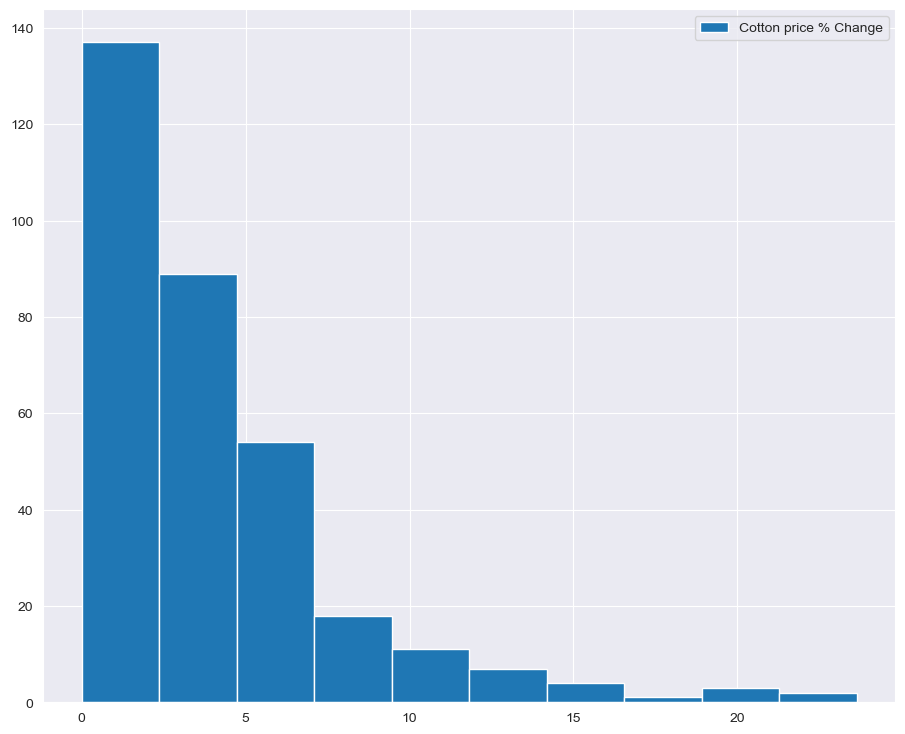

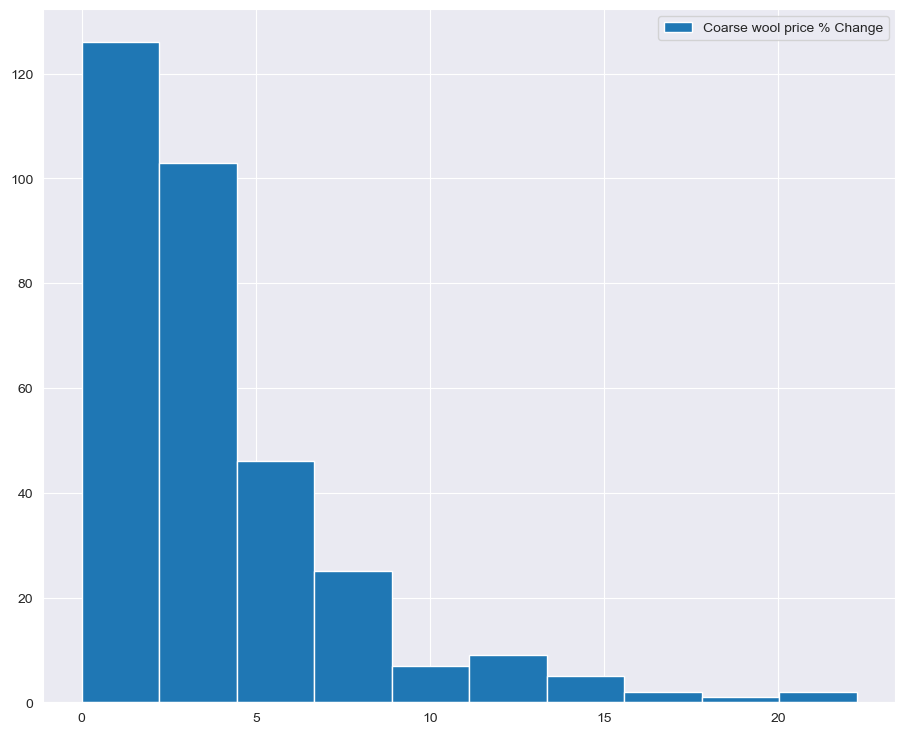

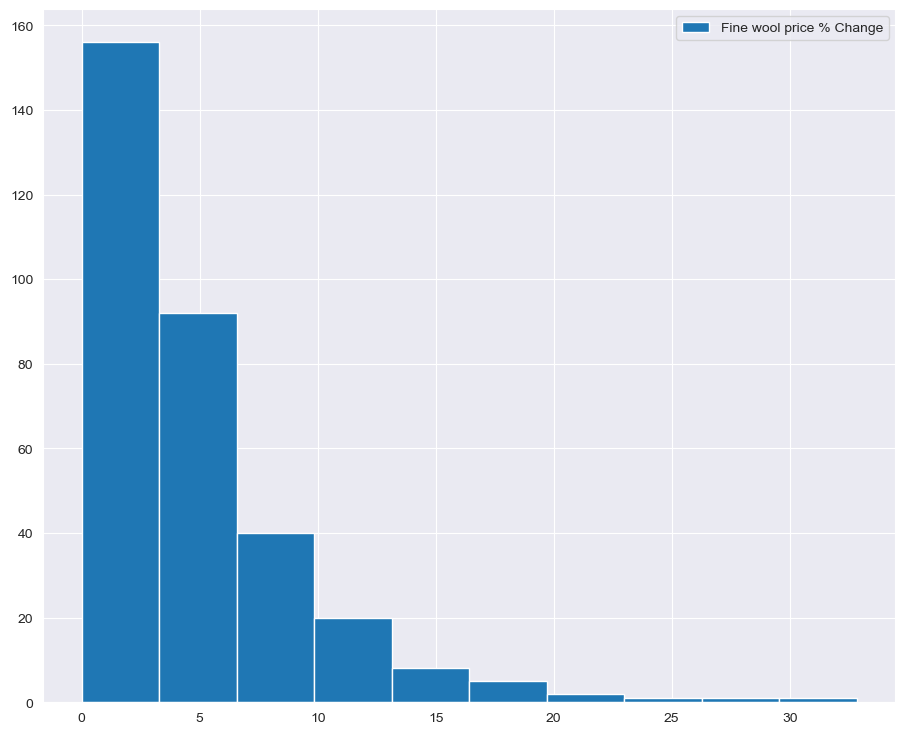

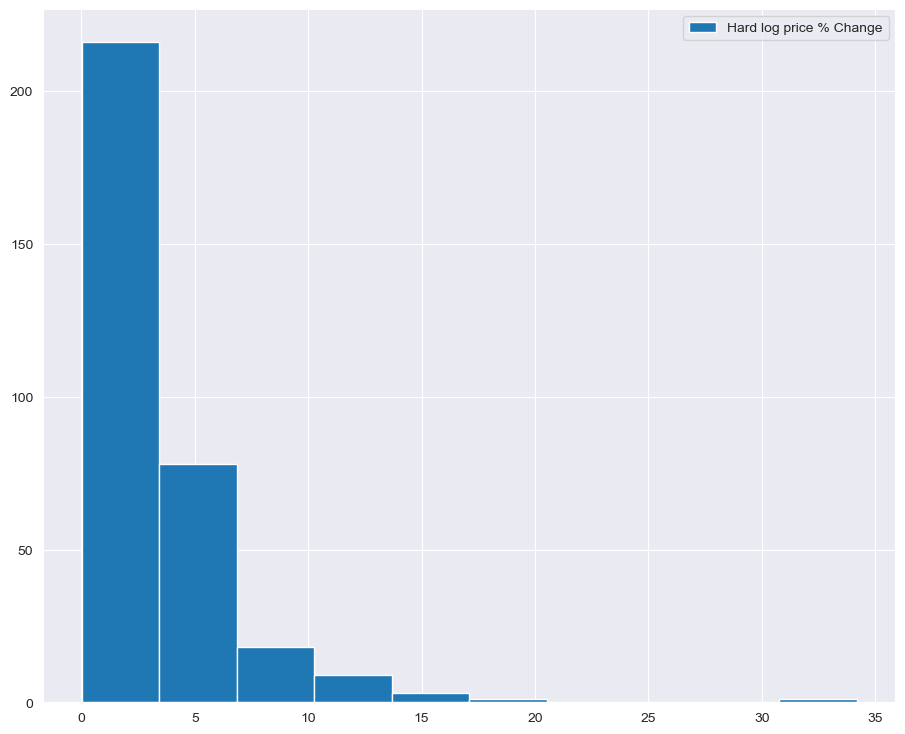

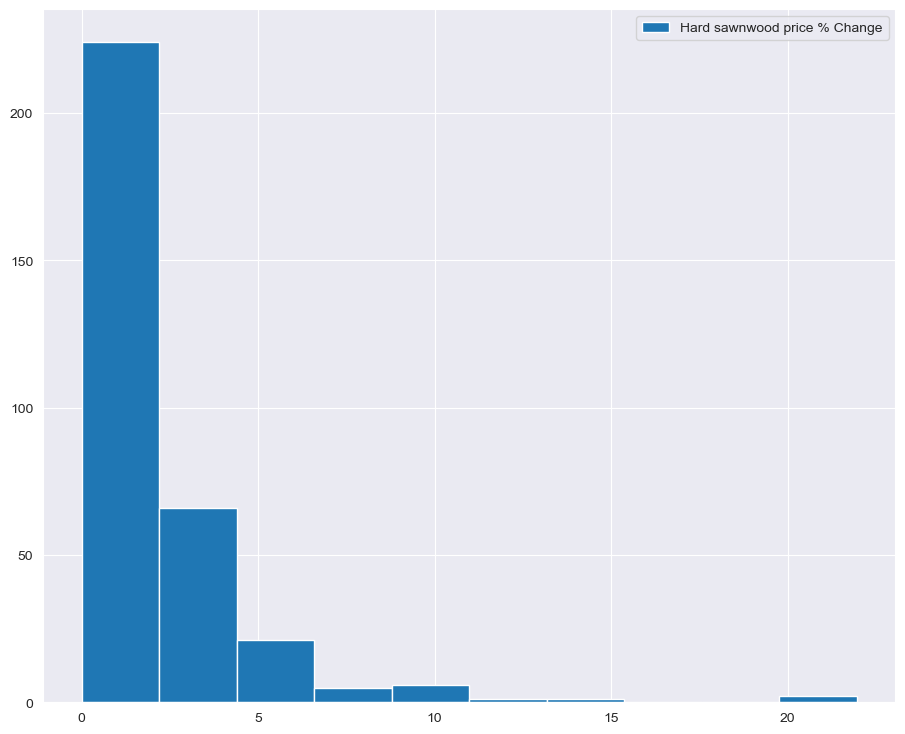

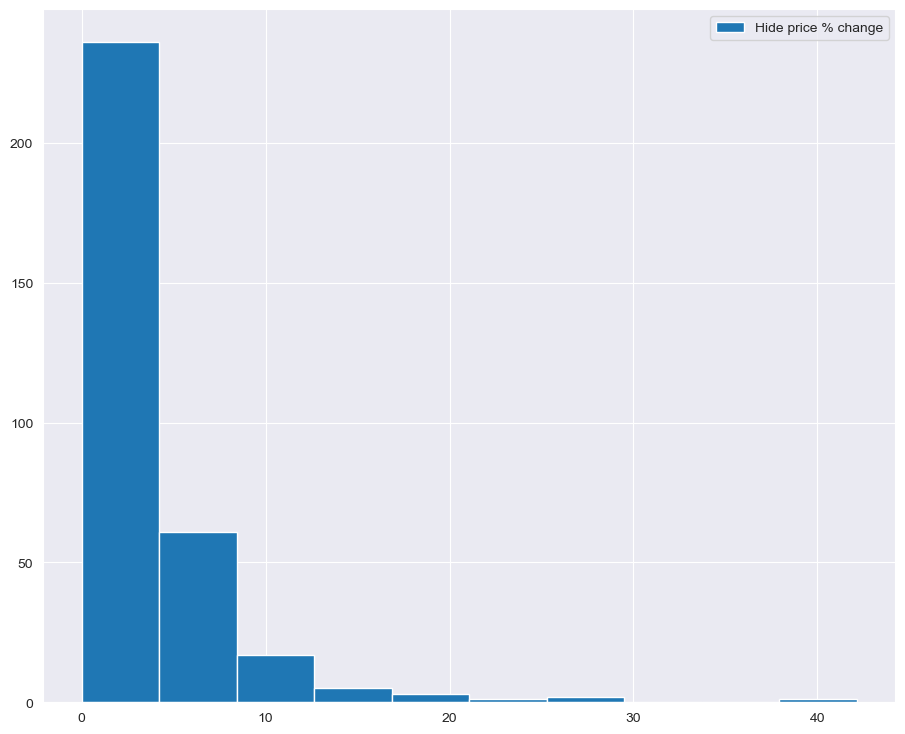

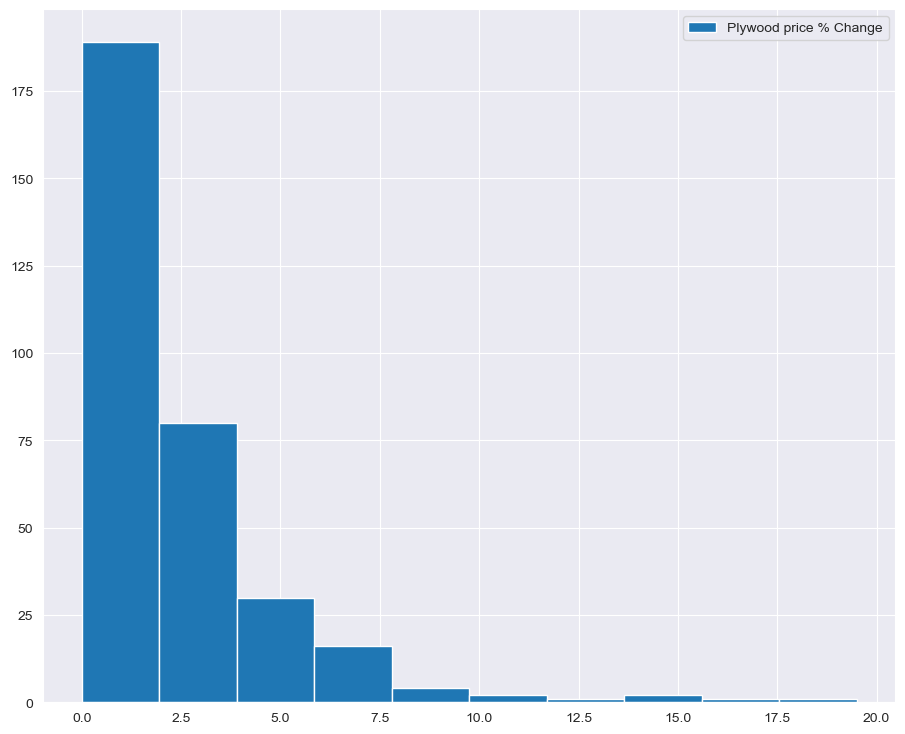

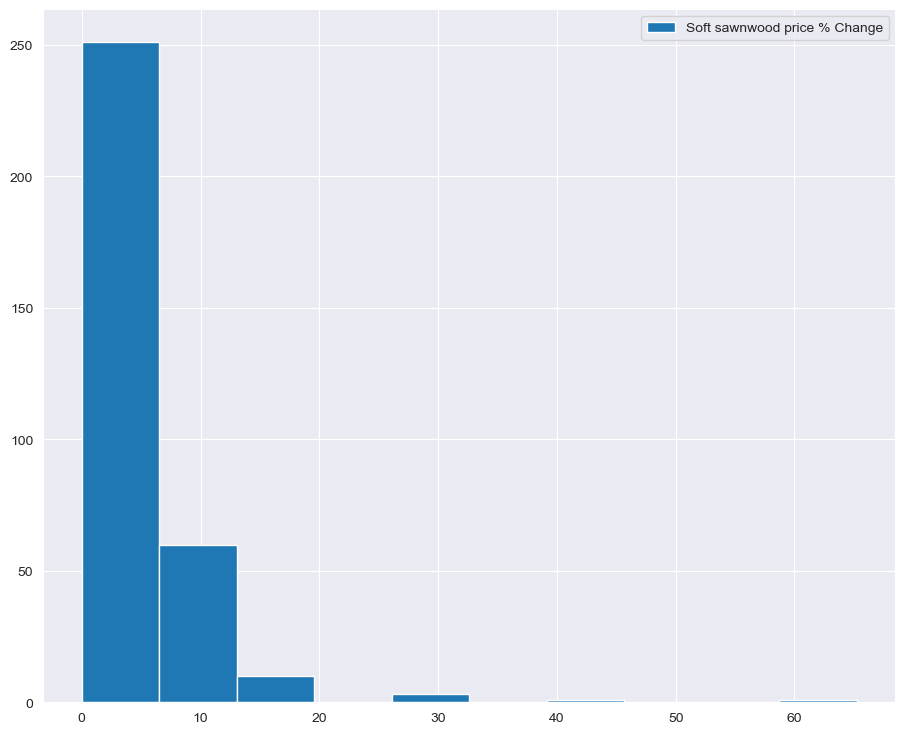

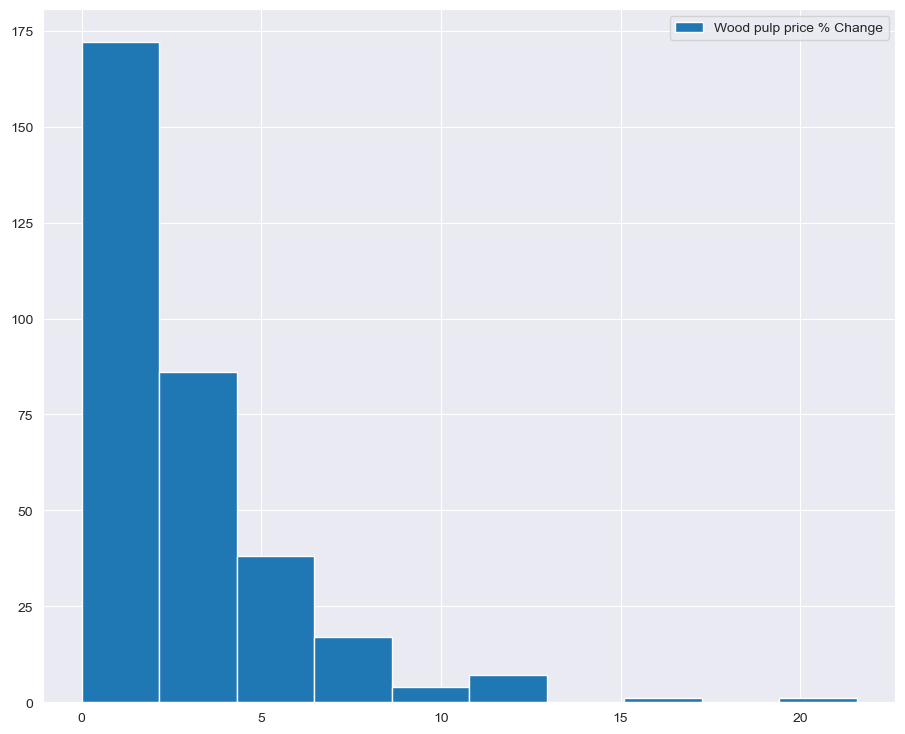

In [48]:
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
for i in range(len(changelist)):
    plt.figure(figsize=(11,11))
    df[changelist[i]].hist(figsize=(11,9))
    plt.legend(changelist[i:])

In [9]:
sns.set_style('darkgrid')

Text(0.5, 0.98, 'Raw-Materials price comparision')

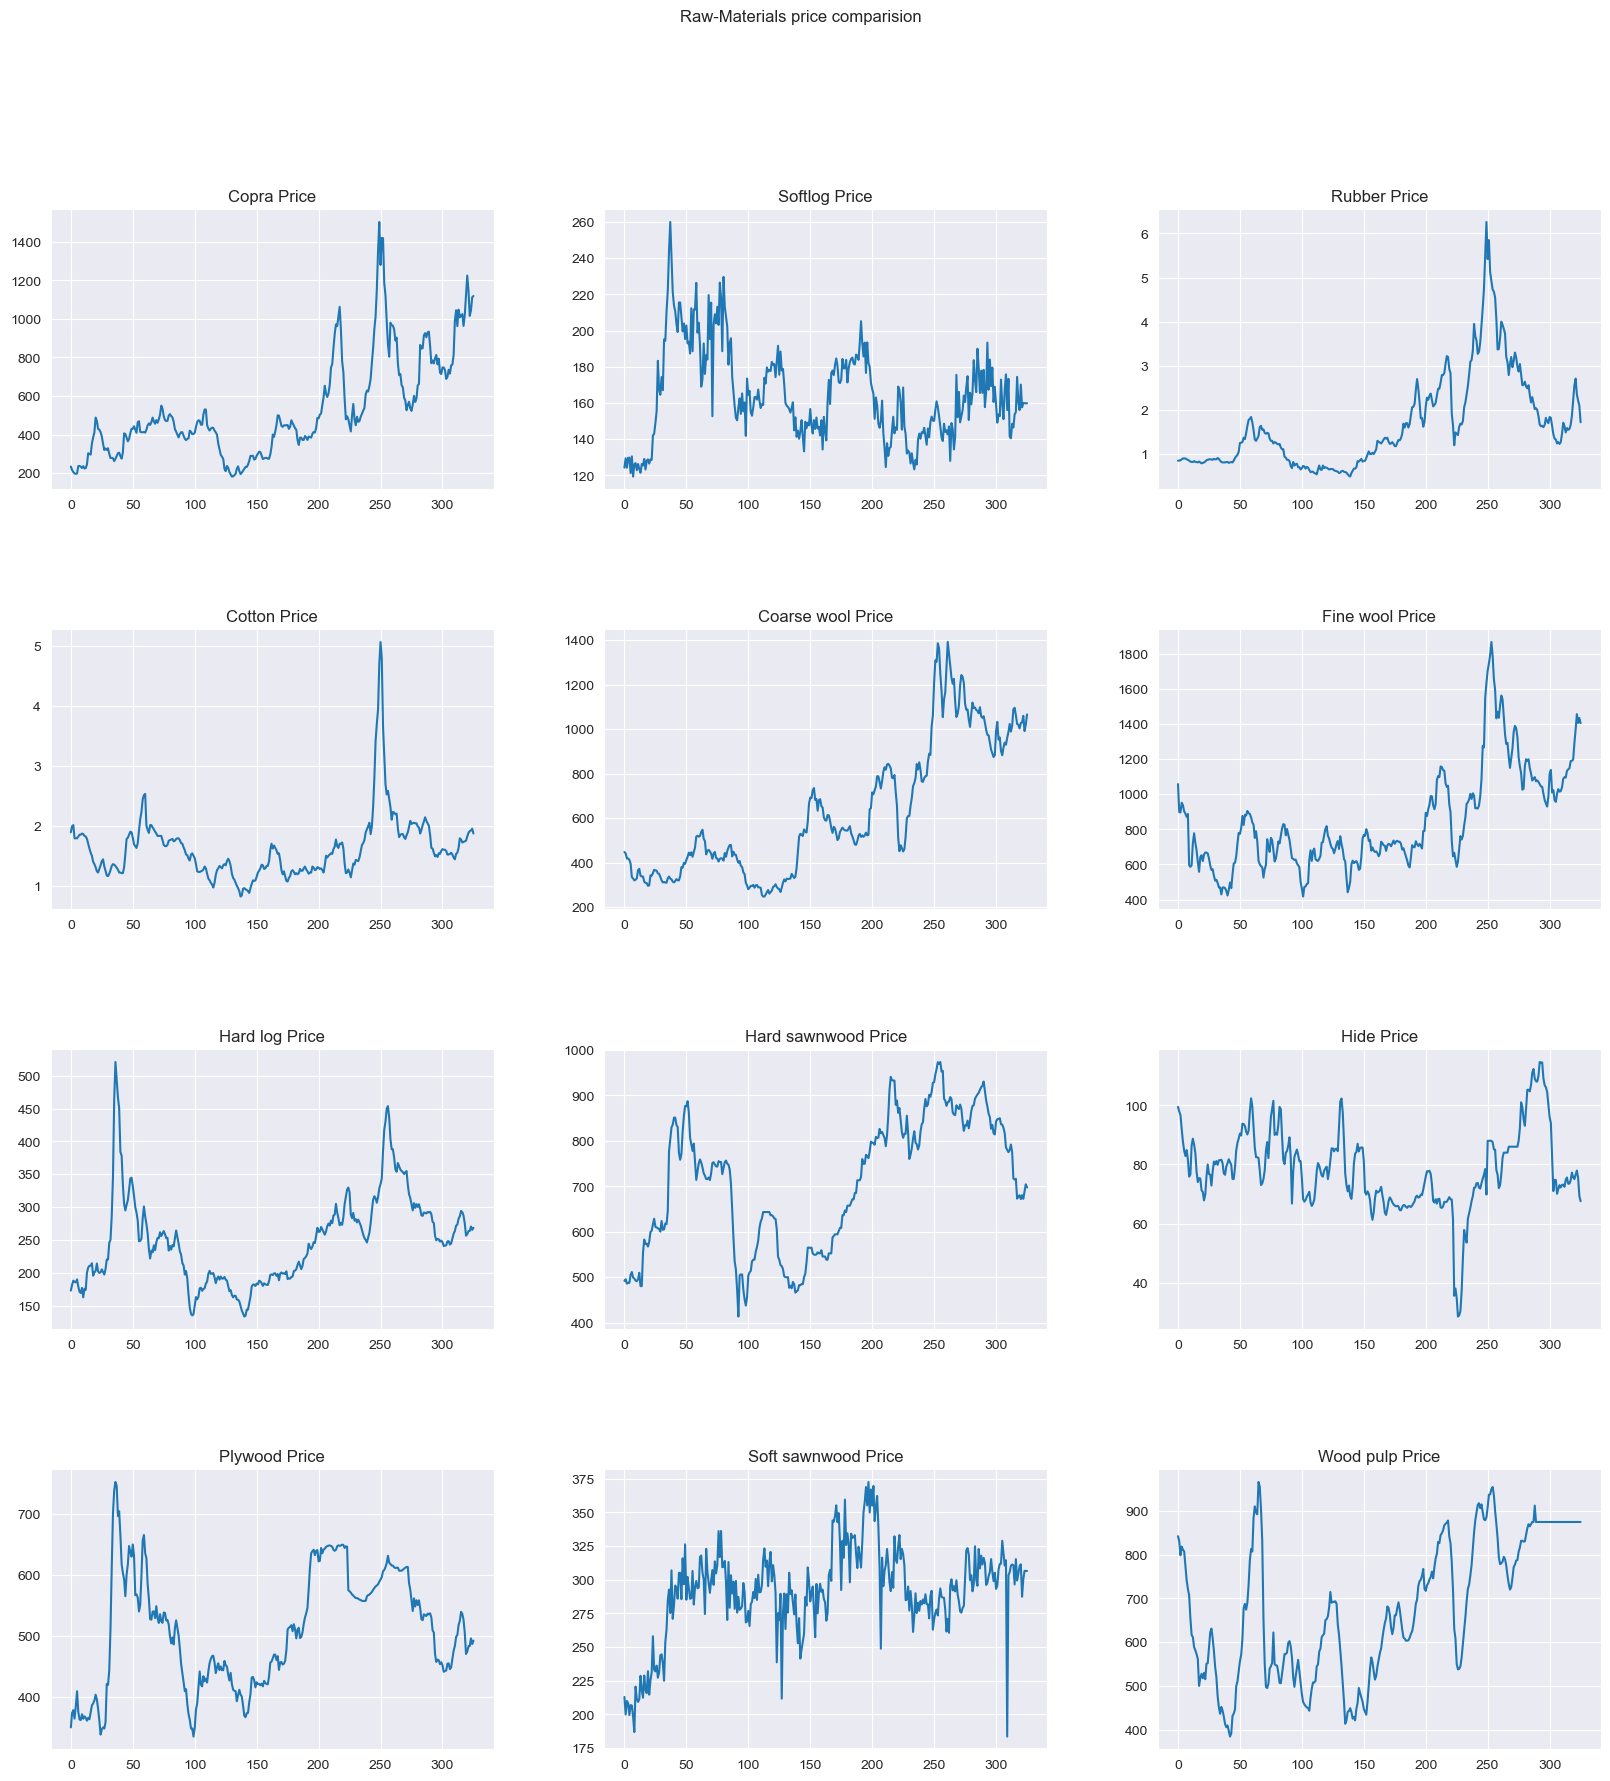

In [110]:
materialslist=['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']
plt.figure(figsize=(20,20))
for i in range(len(materialslist)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.5,wspace=0.25)
    df[materialslist[i]].plot()
    plt.title(materialslist[i])
plt.suptitle('Raw-Materials price comparision')


In [83]:
df

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.00,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.00,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.00,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.00,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.00,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-01,1029.58,0.18,1146.25,6.43,1.88,3.30,1368.14,6.06,263.45,1.88,...,483.23,1.88,2.71,5.86,157.58,7.39,287.43,7.73,875.00,0.00
2017-03-01,1059.60,2.92,1016.00,11.36,1.91,1.60,1454.83,6.34,263.48,0.01,...,483.27,0.01,2.35,13.28,160.05,1.57,300.42,4.52,875.00,0.00
2017-04-01,991.12,6.46,1044.00,2.76,1.92,0.52,1404.98,3.43,270.34,2.60,...,495.87,2.61,2.21,5.96,159.84,0.13,306.60,2.06,875.00,0.00


In [84]:
df.to_csv('cleanedraw-material')

In [86]:
df=pd.read_csv('cleanedraw-material')

In [87]:
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,1990-05-01,447.26,7.27,234.00,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1,1990-06-01,440.99,1.40,216.00,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
2,1990-07-01,418.44,5.11,205.00,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
3,1990-08-01,418.44,0.00,198.00,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
4,1990-09-01,412.18,1.50,196.00,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2017-02-01,1029.58,0.18,1146.25,6.43,1.88,3.30,1368.14,6.06,263.45,...,483.23,1.88,2.71,5.86,157.58,7.39,287.43,7.73,875.00,0.00
322,2017-03-01,1059.60,2.92,1016.00,11.36,1.91,1.60,1454.83,6.34,263.48,...,483.27,0.01,2.35,13.28,160.05,1.57,300.42,4.52,875.00,0.00
323,2017-04-01,991.12,6.46,1044.00,2.76,1.92,0.52,1404.98,3.43,270.34,...,495.87,2.61,2.21,5.96,159.84,0.13,306.60,2.06,875.00,0.00
324,2017-05-01,1019.95,2.91,1112.50,6.56,1.95,1.56,1433.47,2.03,265.28,...,486.59,1.87,2.10,4.98,159.84,0.00,306.60,0.00,875.00,0.00


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cleanedraw-material')

In [3]:
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,1990-05-01,447.26,7.27,234.00,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1,1990-06-01,440.99,1.40,216.00,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
2,1990-07-01,418.44,5.11,205.00,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
3,1990-08-01,418.44,0.00,198.00,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
4,1990-09-01,412.18,1.50,196.00,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2017-02-01,1029.58,0.18,1146.25,6.43,1.88,3.30,1368.14,6.06,263.45,...,483.23,1.88,2.71,5.86,157.58,7.39,287.43,7.73,875.00,0.00
322,2017-03-01,1059.60,2.92,1016.00,11.36,1.91,1.60,1454.83,6.34,263.48,...,483.27,0.01,2.35,13.28,160.05,1.57,300.42,4.52,875.00,0.00
323,2017-04-01,991.12,6.46,1044.00,2.76,1.92,0.52,1404.98,3.43,270.34,...,495.87,2.61,2.21,5.96,159.84,0.13,306.60,2.06,875.00,0.00
324,2017-05-01,1019.95,2.91,1112.50,6.56,1.95,1.56,1433.47,2.03,265.28,...,486.59,1.87,2.10,4.98,159.84,0.00,306.60,0.00,875.00,0.00


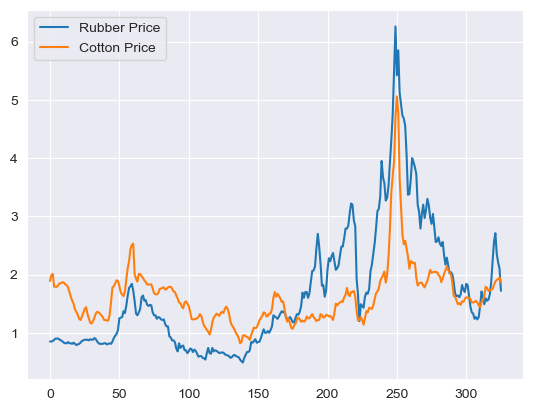

In [49]:
df[['Rubber Price','Cotton Price']].plot()
plt.legend()

<Axes: >

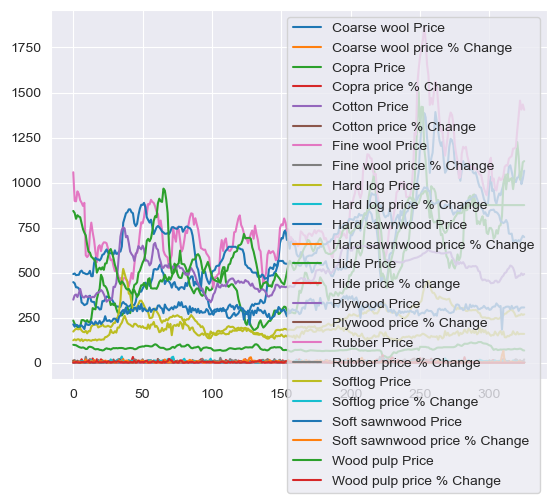

In [63]:
df[['Month', 'Coarse wool Price', 'Coarse wool price % Change',
       'Copra Price', 'Copra price % Change', 'Cotton Price',
       'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change',
       'Hard log Price', 'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change']].plot()

<function matplotlib.pyplot.show(close=None, block=None)>

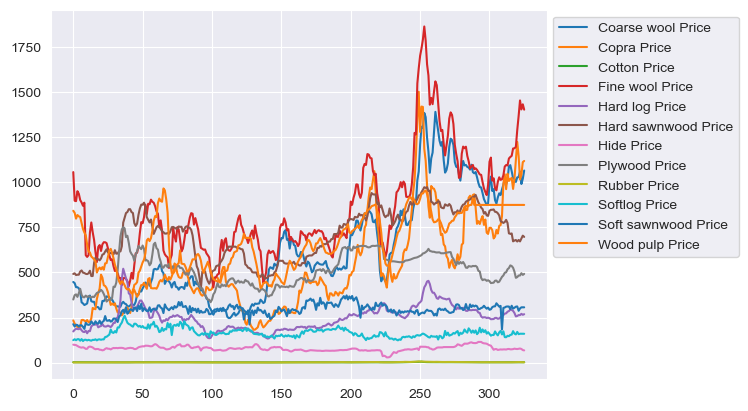

In [109]:
plt.plot(df[a])
plt.legend(a,loc='upper center',bbox_to_anchor=(1.2,1))
plt.show


In [106]:
a=['Coarse wool Price',
       'Copra Price','Cotton Price',
       'Fine wool Price', 
       'Hard log Price', 'Hard sawnwood Price',
       'Hide Price',
       'Plywood Price','Rubber Price',
      'Softlog Price',
       'Soft sawnwood Price',
       'Wood pulp Price']

In [80]:
a

[['Coarse wool Price',
  'Coarse wool price % Change',
  'Copra Price',
  'Copra price % Change',
  'Cotton Price',
  'Cotton price % Change',
  'Fine wool Price',
  'Fine wool price % Change',
  'Hard log Price',
  'Hard log price % Change',
  'Hard sawnwood Price',
  'Hard sawnwood price % Change',
  'Hide Price',
  'Hide price % change',
  'Plywood Price',
  'Plywood price % Change',
  'Rubber Price',
  'Rubber price % Change',
  'Softlog Price',
  'Softlog price % Change',
  'Soft sawnwood Price',
  'Soft sawnwood price % Change',
  'Wood pulp Price',
  'Wood pulp price % Change']]

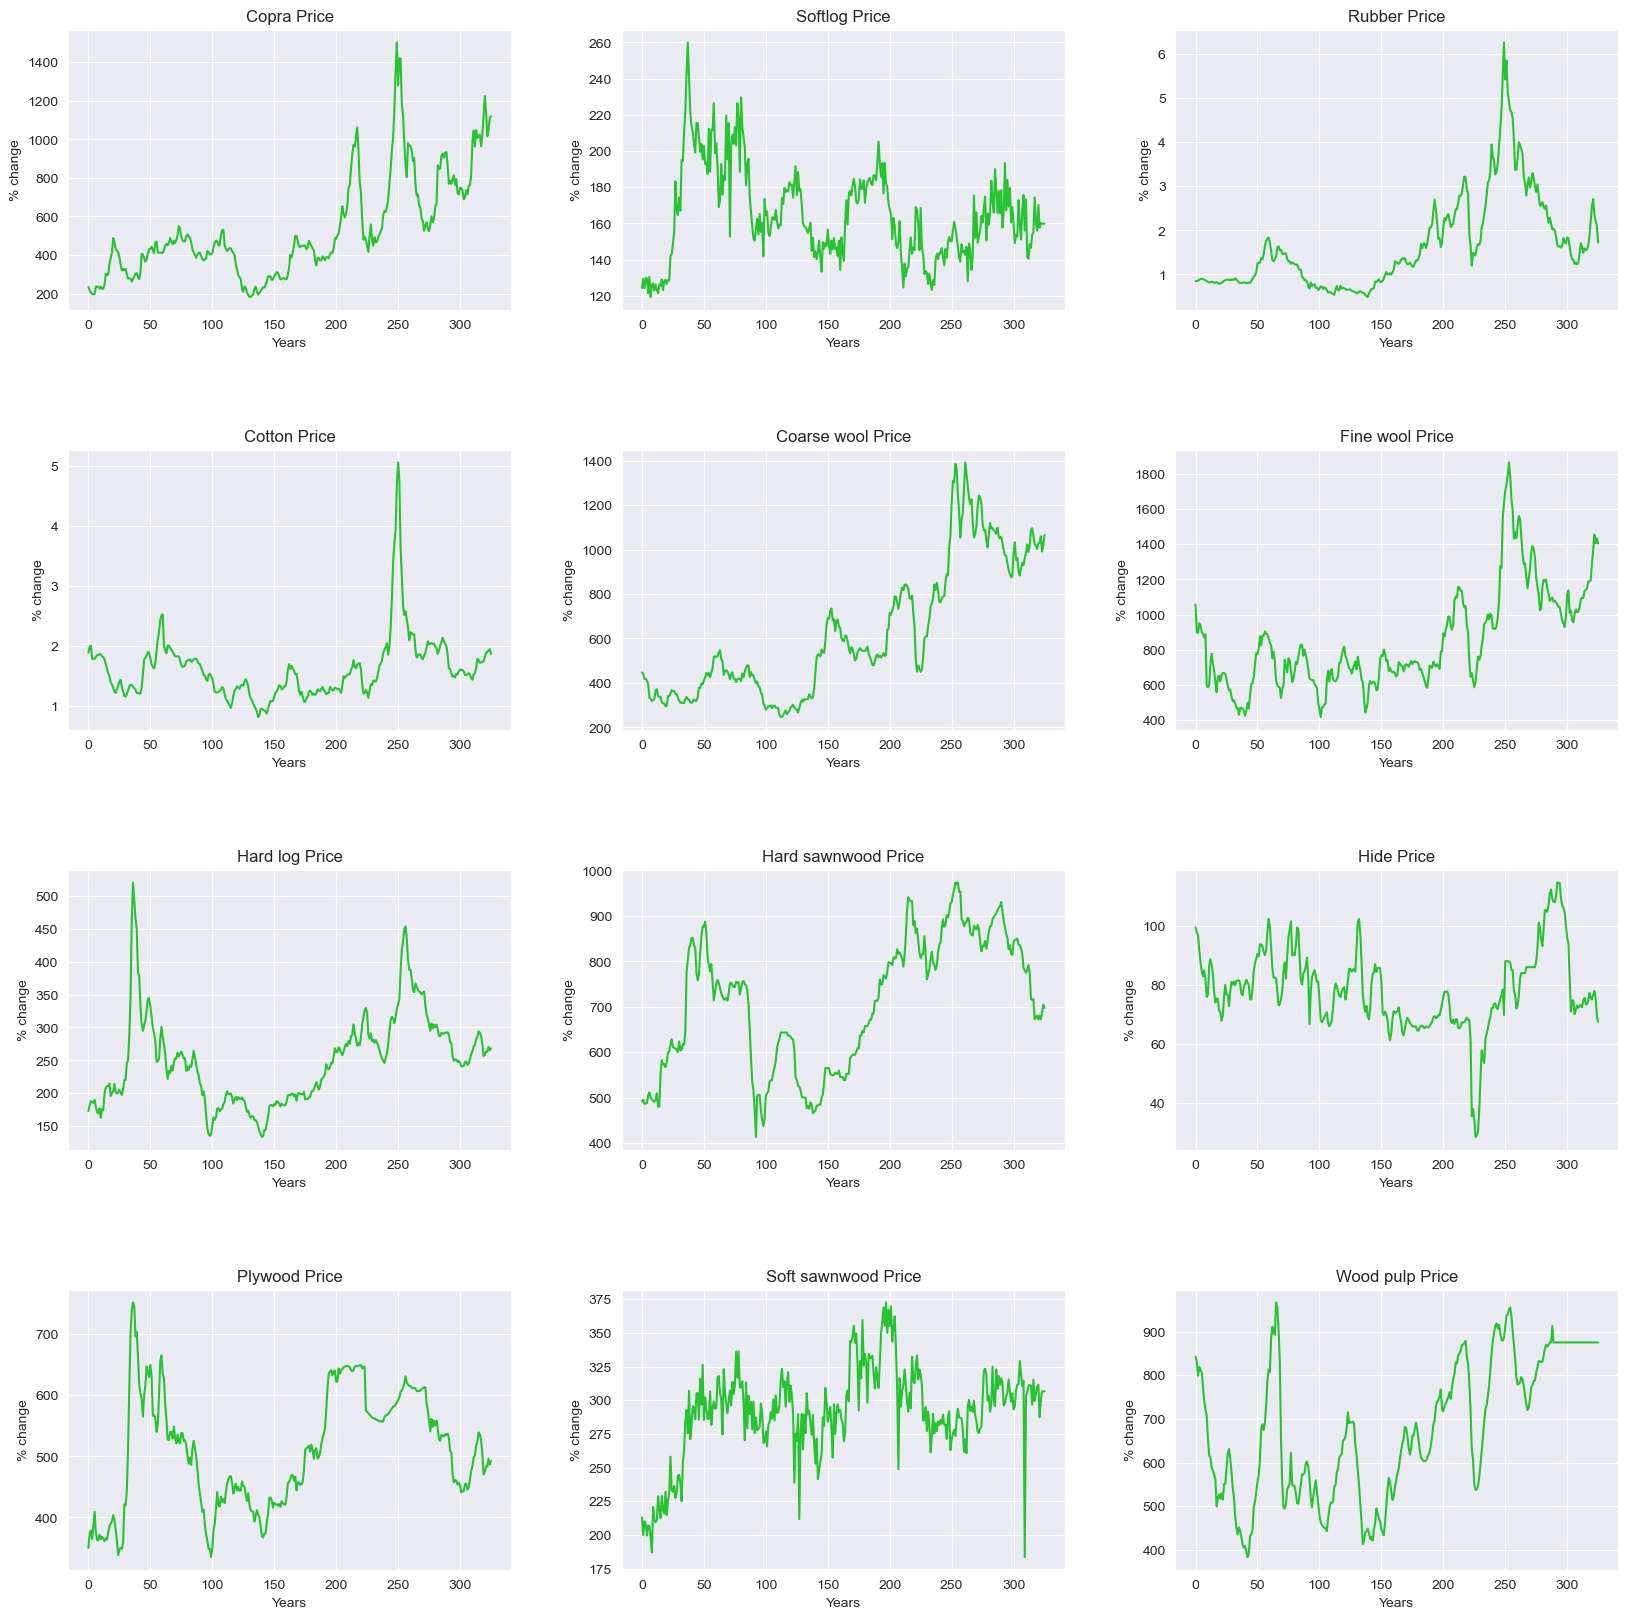

In [143]:
plt.figure(figsize=(20,20))
for i in range(len(materialslist)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.5,wspace=0.25)
    plt.plot(df[materialslist[i]],color=color)
    plt.title(materialslist[i])
    plt.xlabel('Years')
    plt.ylabel('% change')

In [126]:
color=random.random()

In [127]:
import random as random
color

0.7965700236321012

In [129]:
color=random.random()

In [130]:
color

0.8635760650311631

In [135]:
r = random.random()
b = random.random()
g = random.random()
color = (r, g, b)

In [136]:
r

0.8051094765830773

In [137]:
g

0.028204046740110122

In [138]:
b

0.6684624667983433

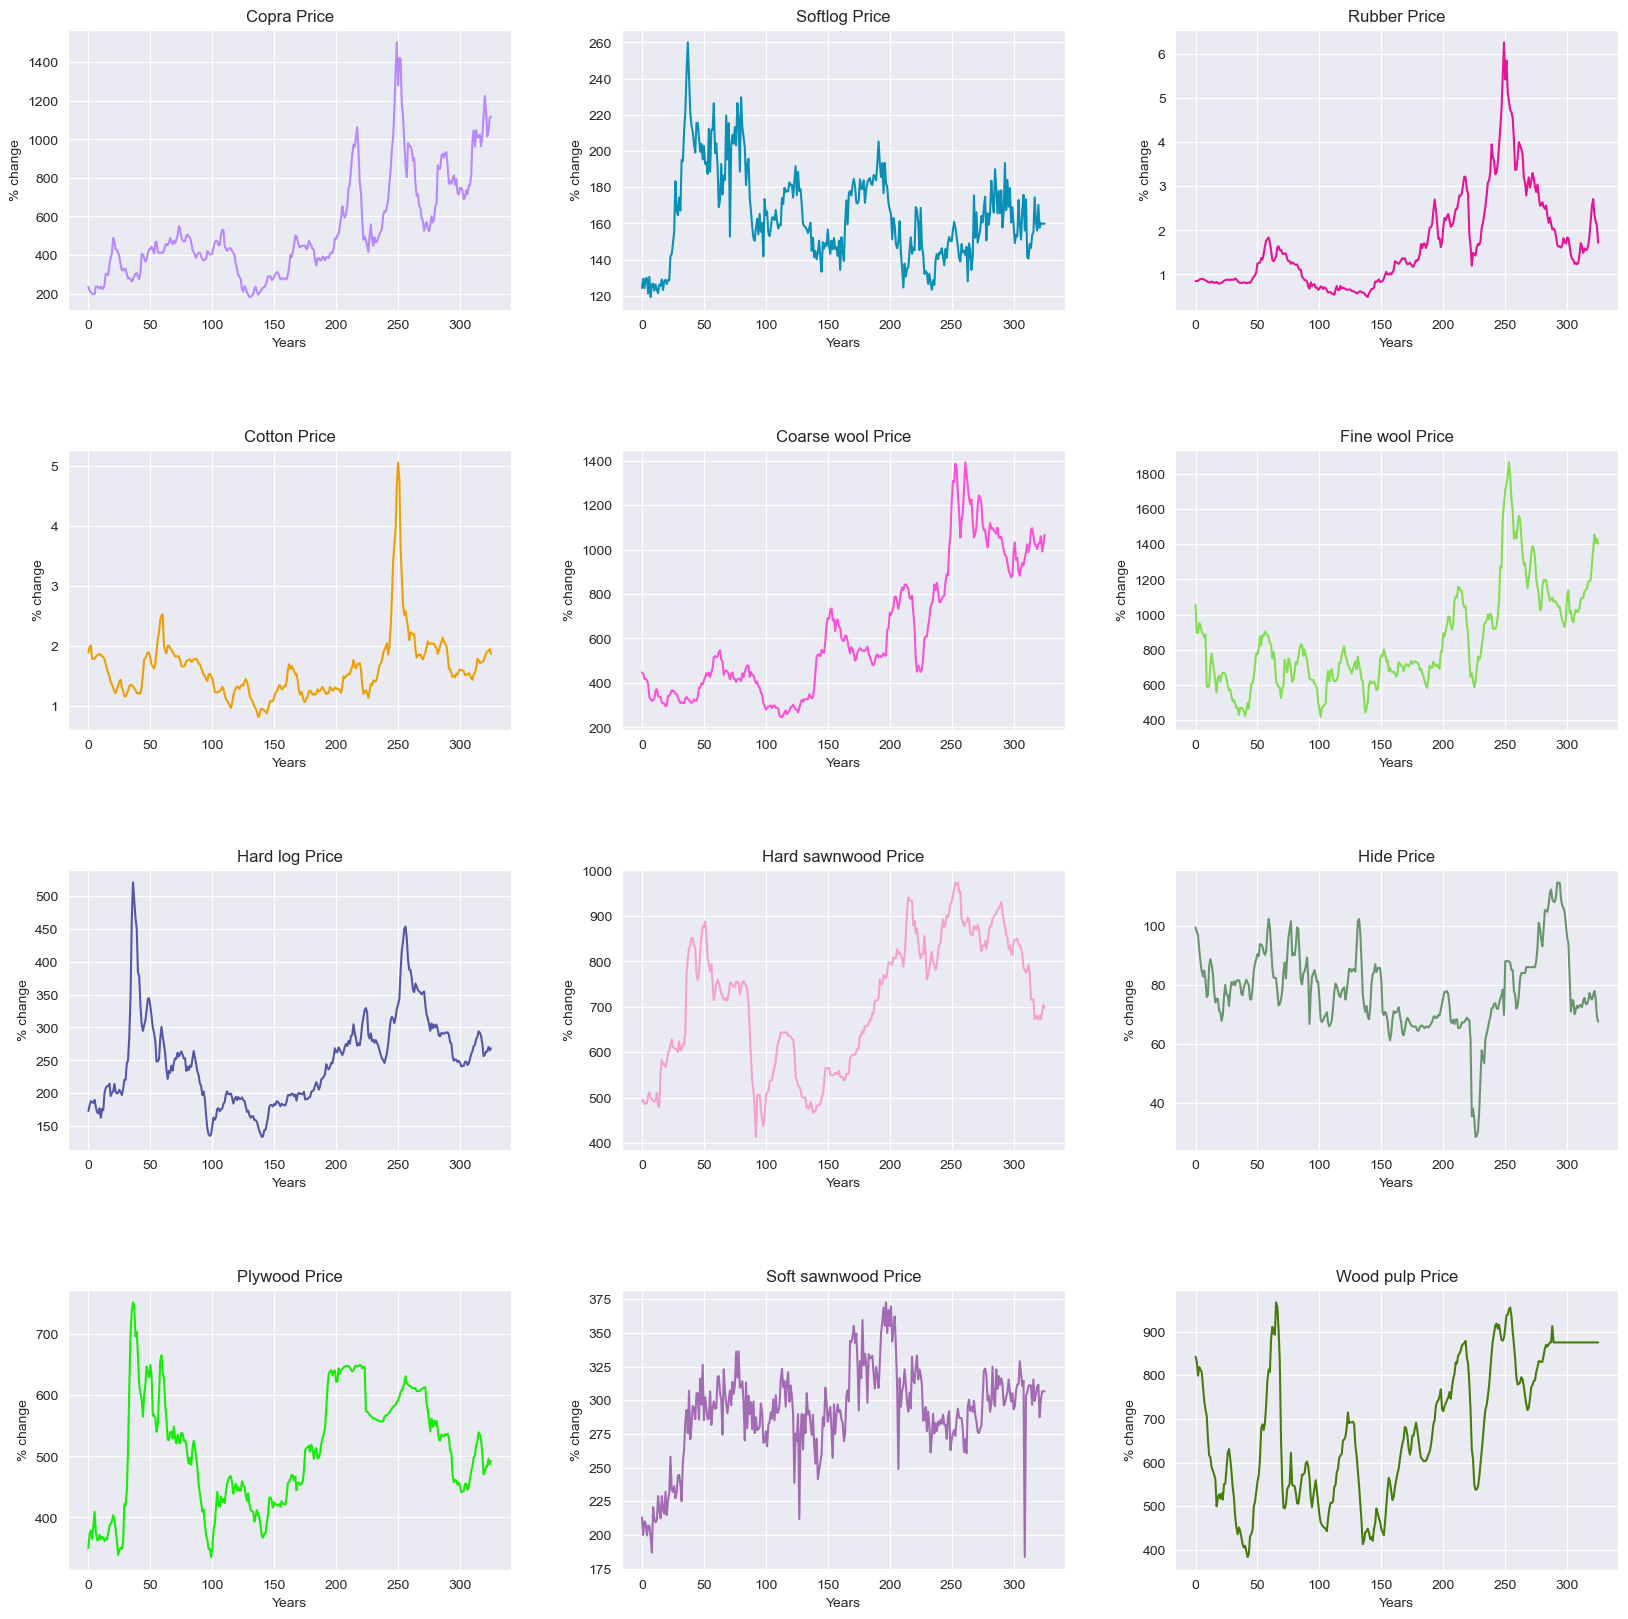

In [145]:
plt.figure(figsize=(20,20))
for i in range(len(materialslist)):
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.5,wspace=0.25)
    plt.plot(df[materialslist[i]],color=color)
    plt.title(materialslist[i])
    plt.xlabel('Years')
    plt.ylabel('% change')

In [148]:
df.index

RangeIndex(start=0, stop=326, step=1)

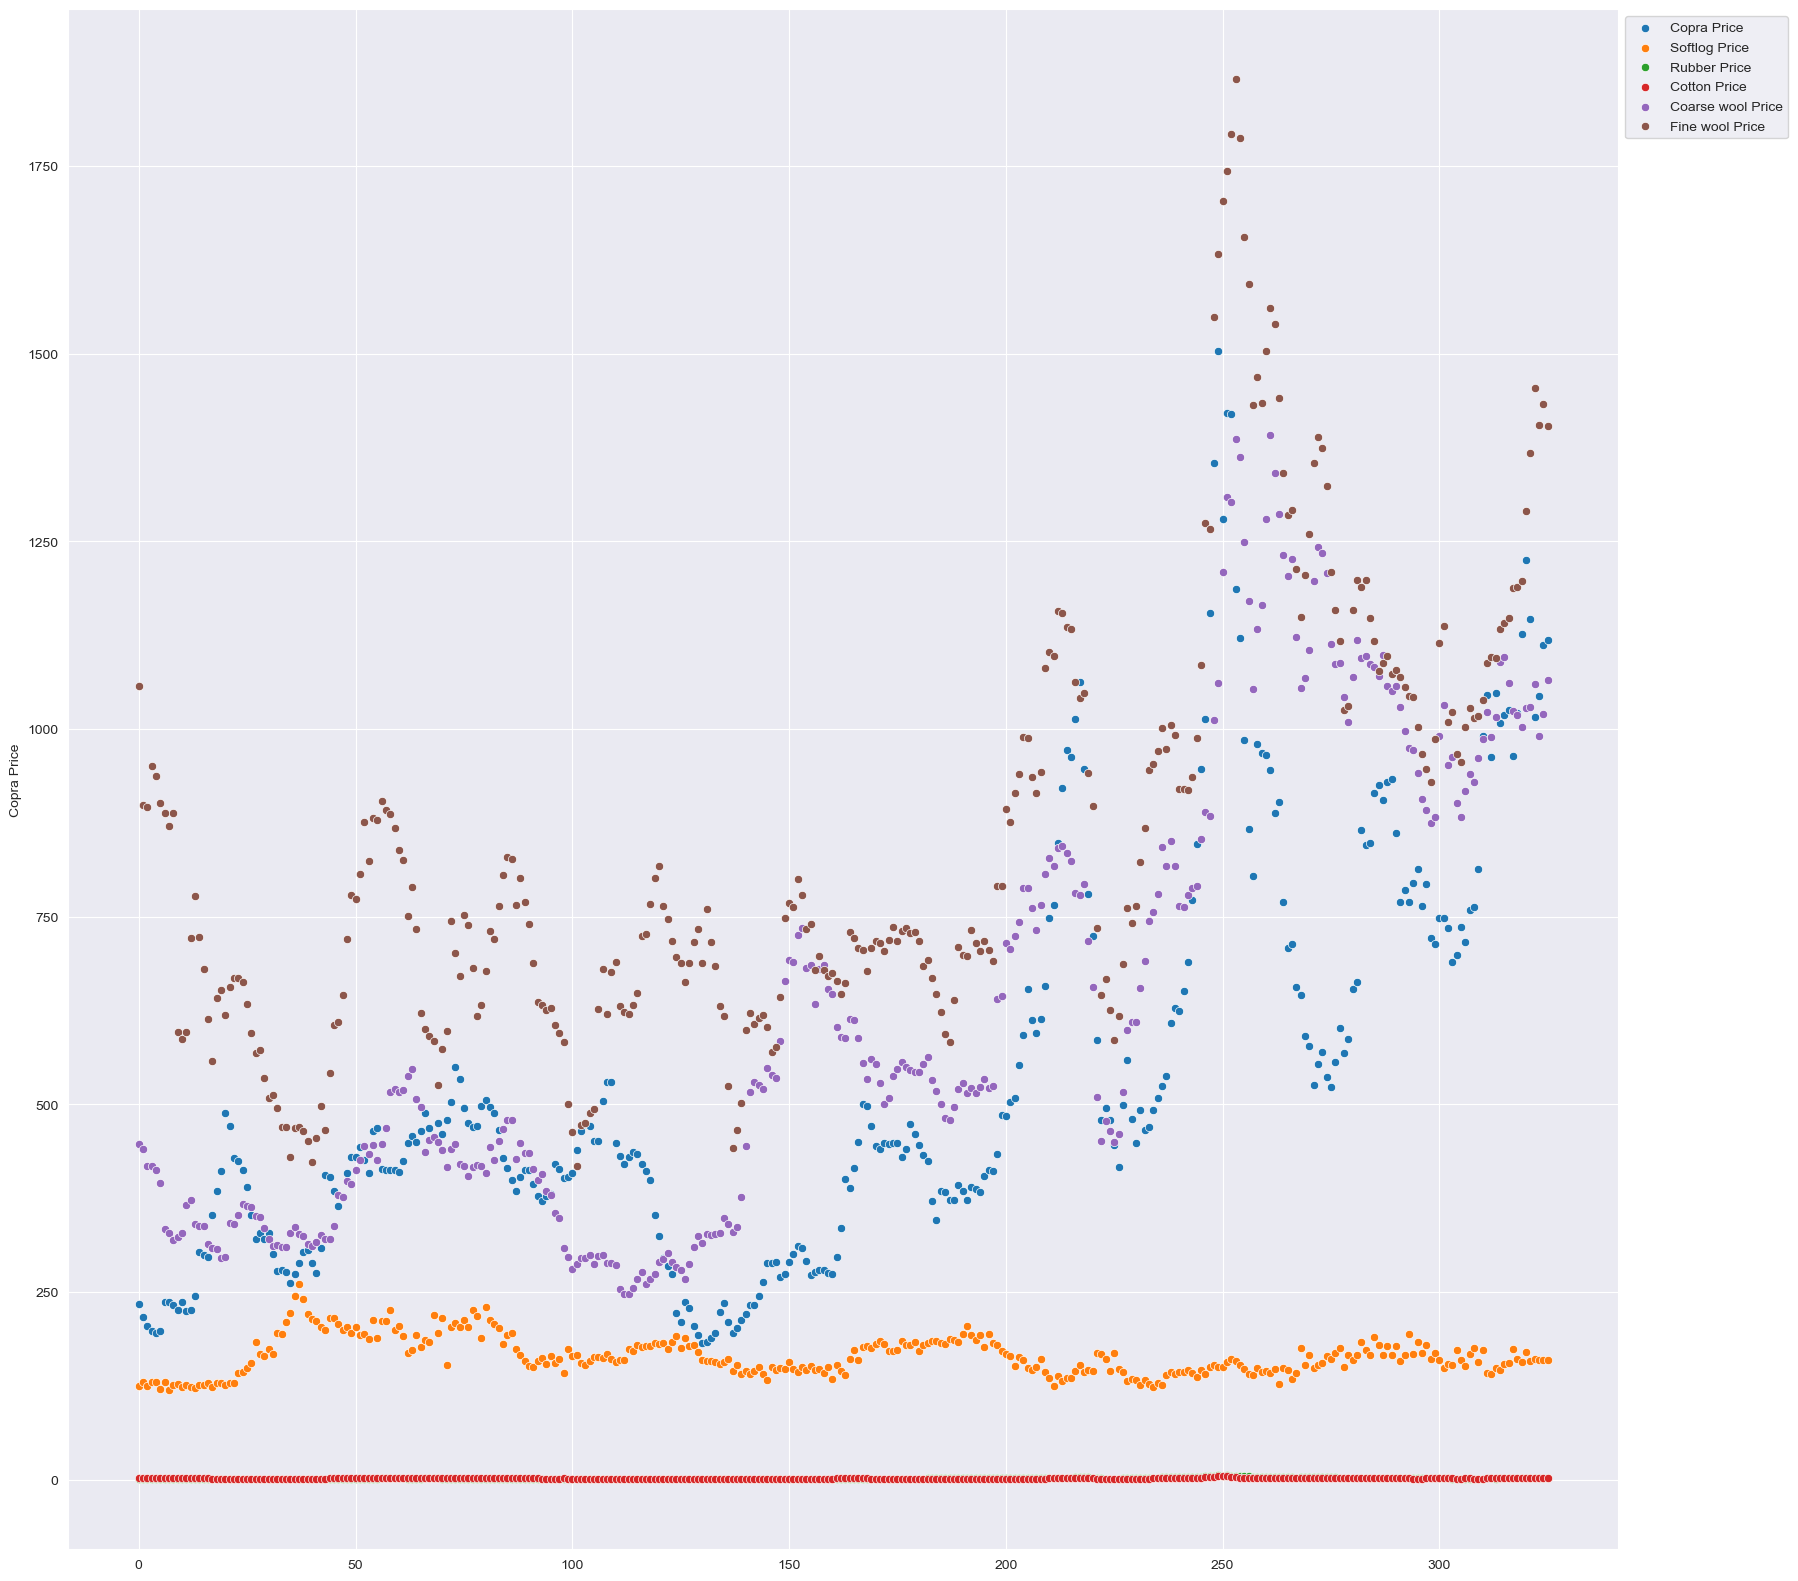

In [202]:
plt.figure(figsize=(20,20))
for i in range(len(lowlist)):
    sns.scatterplot(y=df[materialslist[i]],x=df.index)
    plt.legend(materialslist,loc='upper left',bbox_to_anchor=(1,1))

In [201]:
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
